Case description:
You were hired as a data scientist in an important mutual fund firm in the department of financial analysis. The firm has been doing financial analysis and financial forecast for several years. You were hired to come up with alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

You have to analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. You will receive this dataset in a .csv format.

You have to carefully read the data dictionary to understand each variable and the dataset to understand its structure.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/IA"
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/IA
us2022q2a.csv  usfirms2022.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Hacemos la lectura inicial de los datasets
df_firms = pd.read_csv('usfirms2022.csv')
df_data = pd.read_csv('us2022q2a.csv')
df_firms.head()
df_firms.columns = df_firms.columns.str.replace('Ticker', 'firm')
df_financeAnalysis = pd.merge(df_firms, df_data, on="firm")
df_financeAnalysis
df_financeAnalysis.info()
df_financeAnalysis['qdate'] = pd.PeriodIndex(df_financeAnalysis['q'], freq="Q")

df_financeAnalysis.set_index(['firm', 'qdate'], drop = True)

df_financeAnalysis.index
df_financeAnalysis.columns
df_financeAnalysis['lprice'] = df_financeAnalysis.groupby(['firm'])['adjprice'].shift(4)
df_financeAnalysis['r'] = np.log(df_financeAnalysis['adjprice']) - np.log(df_financeAnalysis['lprice'])
df_financeAnalysis['r2']= np.log(df_financeAnalysis['adjprice']) - np.log(df_financeAnalysis.groupby(['firm'])['adjprice'].shift(4))
df_financeAnalysis.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]
df_financeAnalysis[['q', 'adjprice', 'lprice']]
df_financeAnalysis.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98]

df_firms['Sector NAICS\nlevel 1'].value_counts()
#comenzamos a obtener los valores calculados de book value y market value
df_financeAnalysis["BookV"] = df_financeAnalysis["totalassets"] - df_financeAnalysis["totalliabilities"]
df_financeAnalysis["MarketV"] = df_financeAnalysis["originalprice"] * df_financeAnalysis["sharesoutstanding"] 
df_financeAnalysis["BookV"]
df_financeAnalysis["MarketV"]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323816 entries, 0 to 323815
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   firm                         323816 non-null  object 
 1   Name                         323816 non-null  object 
 2   N                            323816 non-null  int64  
 3   Class                        323816 non-null  object 
 4   Country
of Origin            323816 non-null  object 
 5   Type of Asset                323816 non-null  object 
 6   Sector NAICS
level 1         323816 non-null  object 
 7   Exchange / Src               323816 non-null  object 
 8   Sector
Economatica           323816 non-null  object 
 9   Sector NAICS
last available  323816 non-null  object 
 10  partind                      323816 non-null  object 
 11  q                            323816 non-null  object 
 12  revenue                      158132 non-null  float64
 13 

0         4.566976e+05
1         3.288759e+05
2         3.199267e+05
3         2.647720e+05
4         5.134973e+05
              ...     
323811    1.157355e+07
323812    8.221937e+06
323813    7.169162e+06
323814    1.046345e+07
323815    9.302899e+06
Name: MarketV, Length: 323816, dtype: float64

In [ ]:
# obtenemos el resto de los valores calculados con fórmula
df_financeAnalysis["Ebit"] = df_financeAnalysis["revenue"] - df_financeAnalysis["cogs"] - df_financeAnalysis["sgae"] - df_financeAnalysis["otheropexp"]
df_financeAnalysis["OPM"] = df_financeAnalysis["Ebit"] / df_financeAnalysis["revenue"]
df_financeAnalysis["Net income"] = df_financeAnalysis["Ebit"] - df_financeAnalysis["incometax"] - df_financeAnalysis["finexp"]
df_financeAnalysis["Profit margin"] = df_financeAnalysis["Net income"] / df_financeAnalysis["revenue"]
df_financeAnalysis['qdate'] = pd.PeriodIndex(df_financeAnalysis["q"], freq="Q")
df_financeAnalysis.set_index(['firm', 'qdate'], drop=False)

firm                   Name     N  Class Country\nof Origin  \
firm qdate                                                                 
FLWS 2000Q1  FLWS  1 800 Flowers Com Inc     1  Com A                 US   
     2000Q2  FLWS  1 800 Flowers Com Inc     1  Com A                 US   
     2000Q3  FLWS  1 800 Flowers Com Inc     1  Com A                 US   
     2000Q4  FLWS  1 800 Flowers Com Inc     1  Com A                 US   
     2001Q1  FLWS  1 800 Flowers Com Inc     1  Com A                 US   
...           ...                    ...   ...    ...                ...   
ZNGA 2021Q2  ZNGA              Zynga Inc  3608  Com A                 US   
     2021Q3  ZNGA              Zynga Inc  3608  Com A                 US   
     2021Q4  ZNGA              Zynga Inc  3608  Com A                 US   
     2022Q1  ZNGA              Zynga Inc  3608  Com A                 US   
     2022Q2  ZNGA              Zynga Inc  3608  Com A                 US   

            Type of Asset Sector NAICS\nlevel 1 Exchange / Src  \
firm qdate                                                       
FLWS 2000Q1         Stock          Retail Trade         NASDAQ   
     2000Q2         Stock          Retail Trade         NASDAQ   
     2000Q3         Stock          Retail Trade         NASDAQ   
     2000Q4         Stock          Retail Trade         NASDAQ   
     2001Q1         Stock          Retail Trade         NASDAQ   
...                   ...                   ...            ...   
ZNGA 2021Q2         Stock           Information         NASDAQ   
     2021Q3         Stock           Information         NASDAQ   
     2021Q4         Stock           Information         NASDAQ   
     2022Q1         Stock           Information         NASDAQ   
     2022Q2         Stock           Information         NASDAQ   

            Sector\nEconomatica  \
firm qdate                        
FLWS 2000Q1               Trade   
     2000Q2               Trade   
     2000Q3               Trade   
     2000Q4               Trade   
     2001Q1               Trade   
...                         ...   
ZNGA 2021Q2     Software & Data   
     2021Q3     Software & Data   
     2021Q4     Software & Data   
     2022Q1     Software & Data   
     2022Q2     Software & Data   

                               Sector NAICS\nlast available  ...   qdate  \
firm qdate                                                   ...           
FLWS 2000Q1                                    Retail Trade  ...  2000Q1   
     2000Q2                                    Retail Trade  ...  2000Q2   
     2000Q3                                    Retail Trade  ...  2000Q3   
     2000Q4                                    Retail Trade  ...  2000Q4   
     2001Q1                                    Retail Trade  ...  2001Q1   
...                                                     ...  ...     ...   
ZNGA 2021Q2  Data Processing, Hosting, and Related Services  ...  2021Q2   
     2021Q3  Data Processing, Hosting, and Related Services  ...  2021Q3   
     2021Q4  Data Processing, Hosting, and Related Services  ...  2021Q4   
     2022Q1  Data Processing, Hosting, and Related Services  ...  2022Q1   
     2022Q2  Data Processing, Hosting, and Related Services  ...  2022Q2   

             lprice         r        r2      BookV       MarketV     Ebit  \
firm qdate                                                                  
FLWS 2000Q1     NaN       NaN       NaN   171804.0  4.566976e+05 -21244.0   
     2000Q2     NaN       NaN       NaN   158918.0  3.288759e+05 -15520.0   
     2000Q3     NaN       NaN       NaN   136286.0  3.199267e+05 -24165.0   
     2000Q4     NaN       NaN       NaN   125752.0  2.647720e+05 -12062.0   
     2001Q1   7.125  0.115832  0.115832   117240.0  5.134973e+05  -9655.0   
...             ...       ...       ...        ...           ...      ...   
ZNGA 2021Q2   9.540  0.108187  0.108187  3020600.0  1.157355e+07  74800.0   
     2021Q3   9.120 -0.1915

In [ ]:
#calculamos mas indicadores financieros
df_financeAnalysis['lprice'] = df_financeAnalysis.groupby(['firm'])['adjprice'].shift(4)
df_financeAnalysis[['q','adjprice', 'lprice']]
df_financeAnalysis.loc['ADT':'ADTN', ['adjprice', 'lprice']].iloc[84:98,]
df_financeAnalysis['lprice'] = df_financeAnalysis.groupby(['firm'])['adjprice'].shift(4)
df_financeAnalysis['r'] = np.log(df_financeAnalysis['adjprice']) - np.log(df_financeAnalysis['lprice'])
df_financeAnalysis['r2'] = np.log(df_financeAnalysis['adjprice']) - np.log(df_financeAnalysis.groupby(['firm'])['adjprice'].shift(4))
df_financeAnalysis.loc['ADT':'ADTN',['adjprice','lprice', 'r', 'r2']].iloc[85:96,]

,adjprice,lprice,r,r2


In [ ]:
import plotly.express as px
#aquí haré una grafica para observar como cambio el book value promedio en cada sector a lo largo del tiempo.
px.line(df_financeAnalysis, x = 'q', y = 'BookV', color = 'Sector NAICS\nlevel 1')

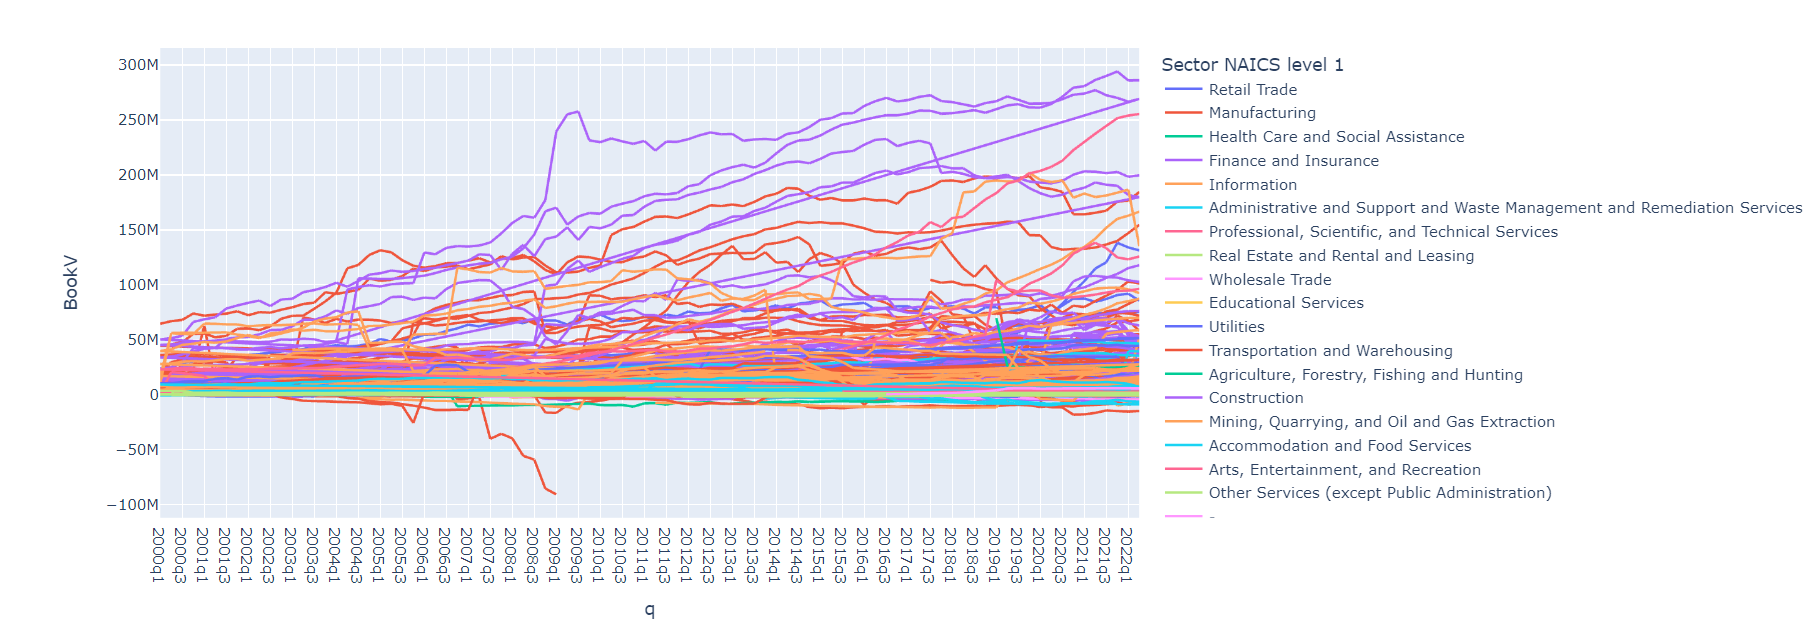

En esta gráfica se ve claramente que son pocas las industrias que sobresalen del promedio y alcanzan un valor de libro por encima de los 100M, habiendo casos excepcionales
que estan cercanso a los 300 M

In [ ]:
# A coninuación haremos el mismo procedimiento pero ahora con el Market value
px.line(df_financeAnalysis, x = 'q', y = 'MarketV', color = 'Sector NAICS\nlevel 1')


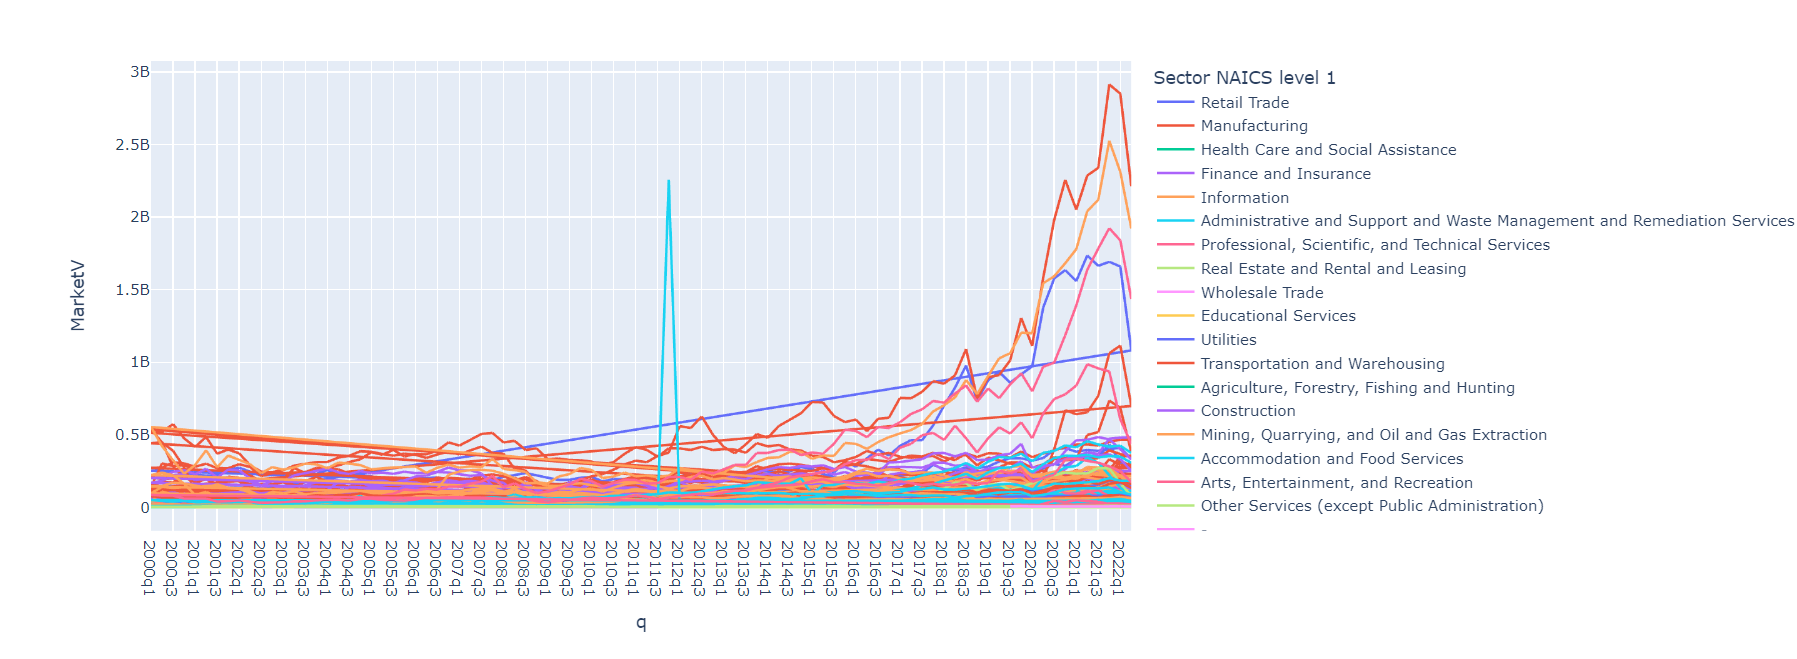

Hablando del market value podemos notar un comportamiento similar en el que solo ciertas industrias sobresalen del promedio. Especificamente son las industrias de manufactura e información

In [ ]:
#Ahora haré una grafica para ver el profit margin en cada trimestre
px.line(df_financeAnalysis, x = 'q', y = 'Profit margin', color = 'Sector NAICS\nlevel 1')


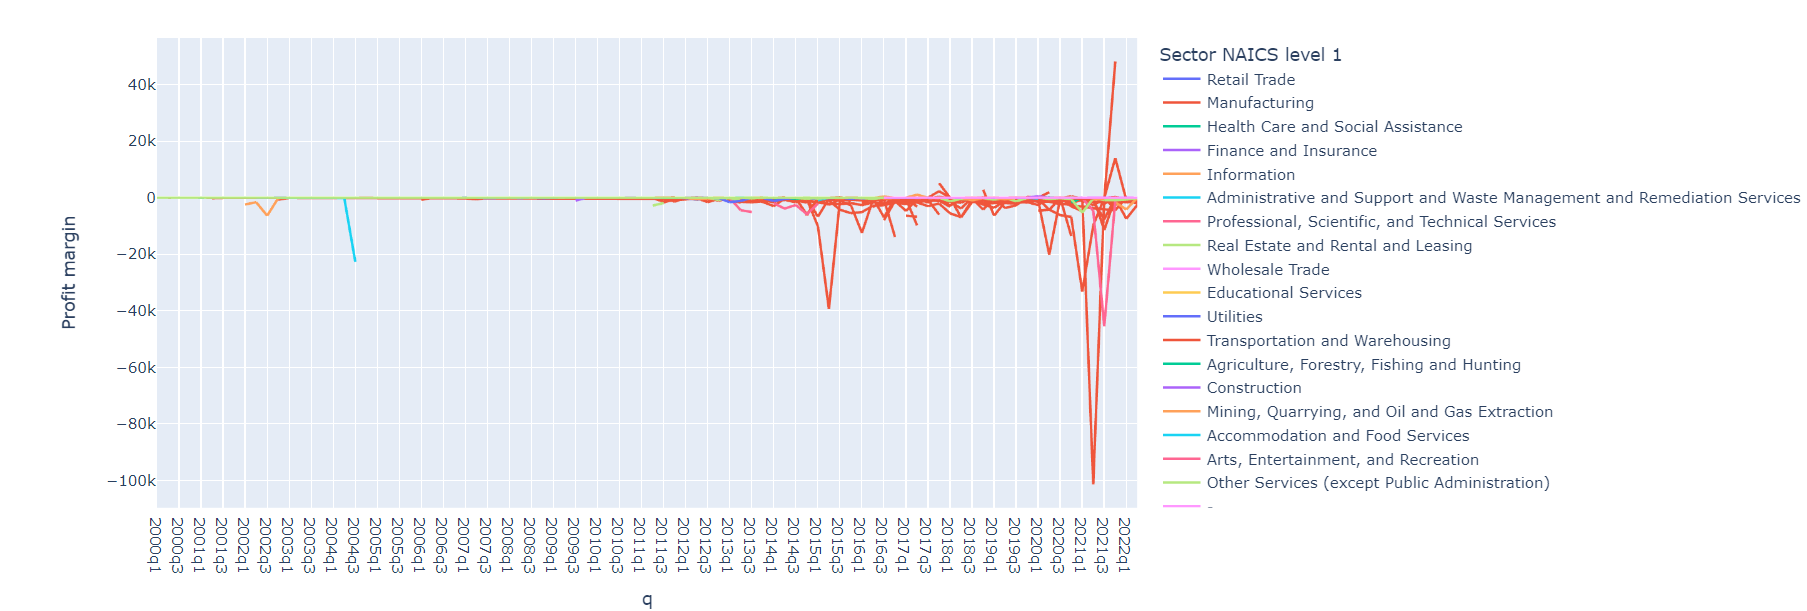

Aquí podemos ver cómo el margen de ganancias tiende a ser negativoen la gran mayoria de sectores del mercado a lo largo del tiempo. tambien veo un reciente incremento en las pérdidas durante el año 2021, lo cual puede ser un indicador de una recesion economica.


In [ ]:
lastq= df_financeAnalysis['q']=='2022q2' 

px.box(df_financeAnalysis[lastq], x = 'Sector\nEconomatica', y = 'BookV', color ="Sector\nEconomatica")


A continuación analizaremos el valor del libro de cada sector especificamente en el ultimo trimestre.

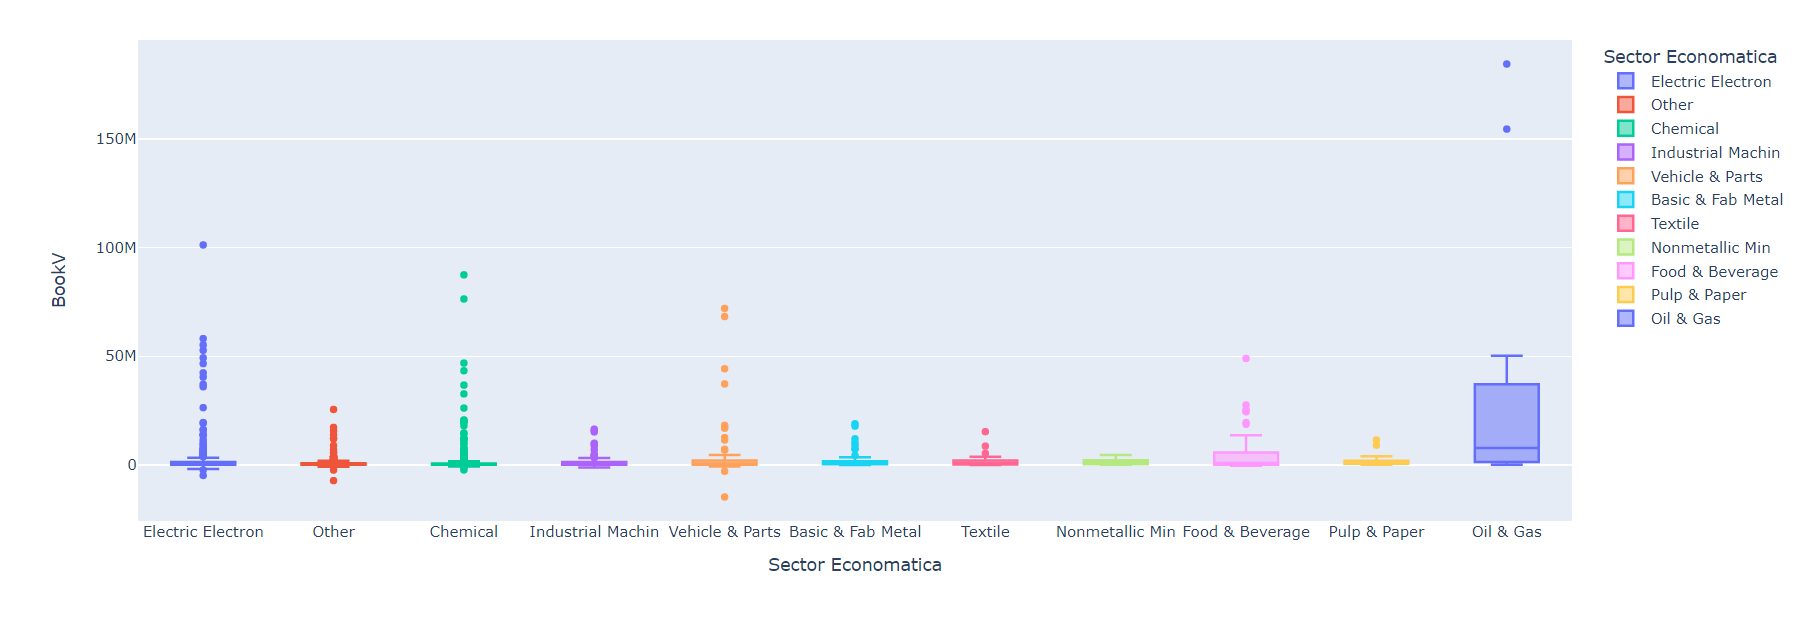

En la grafica anterior podemos observar que las industrias que mayor tamaño de libro presentan parecen ser las relacionadas a la industria quimica y electrica. Se puede ver claramente que en muchas industrias existen valores extremos que sobresalen mucho de la media y estan muy por encima del valor de la mediana que se representa en la grafica.

In [ ]:
lastq= df_financeAnalysis['q']=='2022q2' 

px.box(df_financeAnalysis[lastq], x = 'Sector\nEconomatica', y = 'Profit margin', color ="Sector\nEconomatica")

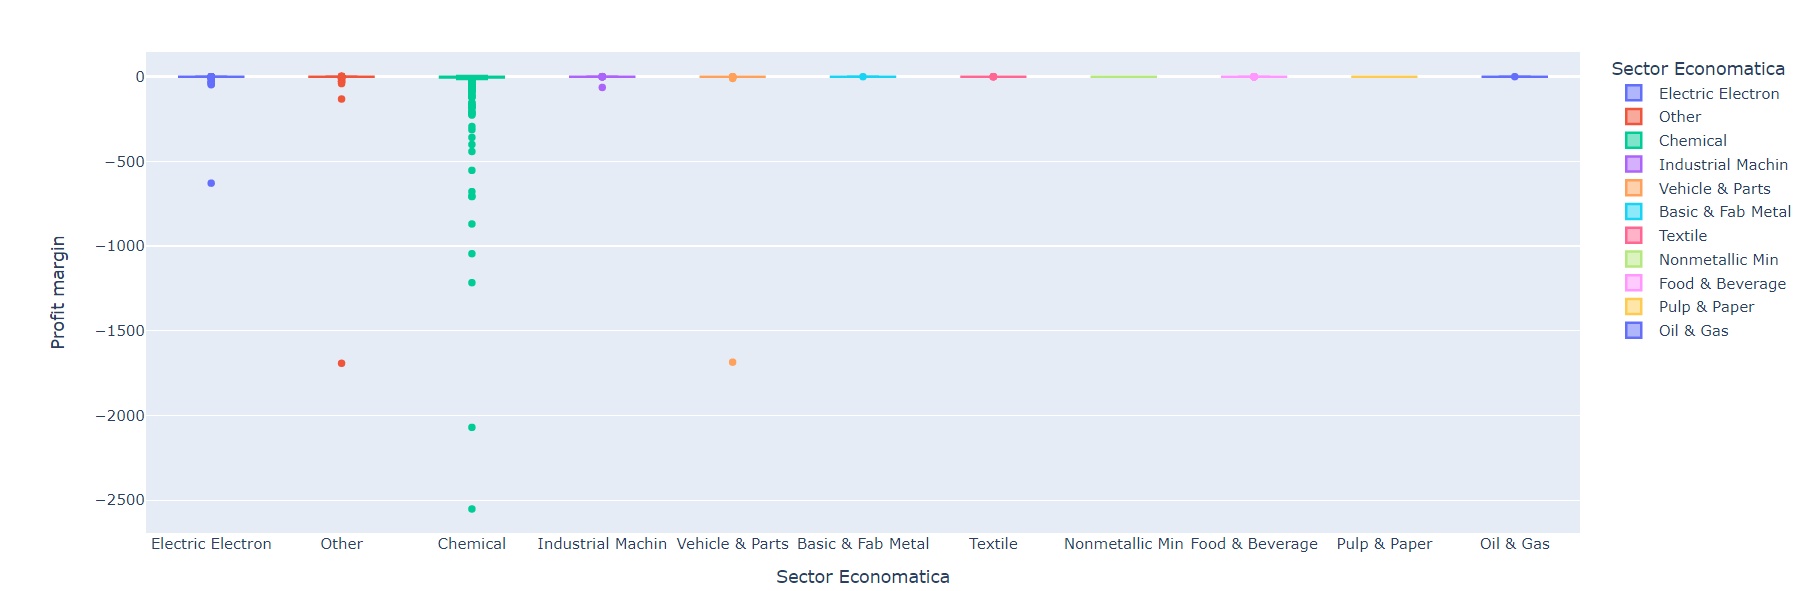

En esta grafica analizamos el Profit margin. vemos muy claramente que la industria quimica presenta los valores más extremos de todos. estos valores nos indican que tenemos margenes negativos de ganancia (perdidas) en esta industria.

In [ ]:
# A continuación vamos a eliminar todos los periodos que no sean el ultimo y lo vamos a guardar en un data frame llamado "df_UltimoPeriodo"
temp=df_financeAnalysis.loc[(df_financeAnalysis["q"] != "2022q2")].index
df_UltimoPeriodo=df_financeAnalysis.drop(temp)

In [ ]:
df_UltimoPeriodo.sort_values('BookV', ascending=False).head(10)


,firm,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,...,qdate,lprice,r,r2,BookV,MarketV,Ebit,OPM,Net income,Profit margin
160545,JPM,Jpmorgan Chase & Co,1791,Com,US,Stock,Finance and Insurance,NYSE,Finance and Insurance,Depository Credit Intermediation,...,2022Q2,150.352279,-0.297857,-0.297857,286143000.0,3.302370e+08,15128000.0,0.811327,12912000.0,0.692481
38153,BAC,Bank Of America Corp,424,Com,US,Stock,Finance and Insurance,NYSE,Finance and Insurance,Depository Credit Intermediation,...,2022Q2,40.392027,-0.260460,-0.260460,269118000.0,2.508107e+08,12444000.0,0.830985,11799000.0,0.787913
14573,GOOGL,Alphabet Inc,162,Com A,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,"Professional, Scientific, and Technical Services",...,2022Q2,122.089500,-0.113746,-0.113746,255419000.0,1.435042e+09,19453000.0,0.279156,16441000.0,0.235933
67410,C,Citigroup Inc,753,Com,US,Stock,Finance and Insurance,NYSE,Finance and Insurance,Depository Credit Intermediation,...,2022Q2,67.801588,-0.397974,-0.397974,199626000.0,8.906928e+07,11964000.0,0.765451,10782000.0,0.689827
109530,XOM,Exxon Mobil Corp,1222,Com,US,Stock,Manufacturing,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,...,2022Q2,59.450636,0.355337,0.355337,184508000.0,3.569164e+08,20831000.0,0.187220,14278000.0,0.128324
314185,WFC,Wells Fargo & Company,3501,Com,US,Stock,Finance and Insurance,NYSE,Finance and Insurance,Depository Credit Intermediation,...,2022Q2,44.172347,-0.127047,-0.127047,179793000.0,1.484681e+08,10198000.0,0.882485,9585000.0,0.829439
189073,MSFT,Microsoft Corp,2109,Com,US,Stock,Information,NASDAQ,Software & Data,Software Publishers,...,2022Q2,268.136729,-0.045203,-0.045203,166542000.0,1.920840e+09,20534000.0,0.395912,16787000.0,0.323667
64890,CVX,Chevron Corp,725,Com,US,Stock,Manufacturing,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,...,2022Q2,99.376429,0.367255,0.367255,154562000.0,2.833974e+08,16119000.0,0.234417,11702000.0,0.170181
30863,T,AT&T Inc,343,Com,US,Stock,Information,NYSE,Telecommunication,Wired Telecommunications Carriers,...,2022Q2,19.952518,0.036053,0.036053,135307000.0,1.500526e+08,4956000.0,0.167190,1945000.0,0.065614
15653,AMZN,"Amazon.Com, Inc",174,Com,US,Stock,Retail Trade,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,...,2022Q2,172.008000,-0.482123,-0.482123,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109


Aquí podemos ver las 10 empresas más grandes en cuanto a su valor del libro.

In [ ]:
df_UltimoPeriodo.sort_values('MarketV', ascending=False).head(10)

,firm,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,...,qdate,lprice,r,r2,BookV,MarketV,Ebit,OPM,Net income,Profit margin
23663,AAPL,Apple Inc,263,Com,US,Stock,Manufacturing,NASDAQ,Electric Electron,Computer and Peripheral Equipment Manufacturing,...,2022Q2,135.993065,0.003943,0.003943,58107000.0,2.212838e+09,23076000.0,0.278162,19452000.0,0.234477
189073,MSFT,Microsoft Corp,2109,Com,US,Stock,Information,NASDAQ,Software & Data,Software Publishers,...,2022Q2,268.136729,-0.045203,-0.045203,166542000.0,1.920840e+09,20534000.0,0.395912,16787000.0,0.323667
14573,GOOGL,Alphabet Inc,162,Com A,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,"Professional, Scientific, and Technical Services",...,2022Q2,122.089500,-0.113746,-0.113746,255419000.0,1.435042e+09,19453000.0,0.279156,16441000.0,0.235933
15653,AMZN,"Amazon.Com, Inc",174,Com,US,Stock,Retail Trade,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,...,2022Q2,172.008000,-0.482123,-0.482123,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109
281245,TSLA,"Tesla, Inc",3135,Com,US,Stock,Manufacturing,NASDAQ,Vehicle & Parts,Motor Vehicle Manufacturing,...,2022Q2,679.700000,-0.009282,-0.009282,37237000.0,6.976698e+08,2464000.0,0.145506,2241000.0,0.132337
298795,UNH,Unitedhealth Group Inc,3330,Com,US,Stock,Finance and Insurance,NYSE,Finance and Insurance,Insurance Carriers,...,2022Q2,395.159334,0.262214,0.262214,76205000.0,4.818731e+08,7132000.0,0.088782,5199000.0,0.064719
160095,JNJ,Johnson & Johnson,1785,Com,US,Stock,Manufacturing,NYSE,Chemical,Pharmaceutical and Medicine Manufacturing,...,2022Q2,160.631179,0.099916,0.099916,76357000.0,4.671001e+08,6087000.0,0.253414,5087000.0,0.211782
187453,META,"Meta Platforms, Inc",2091,Com A,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,"Professional, Scientific, and Technical Services",...,2022Q2,347.710000,-0.768413,-0.768413,125767000.0,4.363946e+08,8358000.0,0.289987,6859000.0,0.237978
207635,NVDA,Nvidia Corp,2317,Com,US,Stock,Manufacturing,NASDAQ,Electric Electron,Semiconductor and Other Electronic Component M...,...,2022Q2,199.888928,-0.276582,-0.276582,26320000.0,3.789750e+08,1868000.0,0.225386,1631000.0,0.196791
308875,V,Visa Inc,3442,Com A,US,Stock,Administrative and Support and Waste Managemen...,NYSE,Other,Business Support Services,...,2022Q2,231.858465,-0.165252,-0.165252,35483000.0,3.743426e+08,4148000.0,0.570172,3619000.0,0.497457


Aquí podemos ver las 10 empresas más grandes en cuanto a su calor del mercado.

In [ ]:
#Este codigo nos permite hacer un analisis de correlacion de las demás variables con respecto a revenue
df_corrs = df_financeAnalysis.corr()["revenue"]
df_corrs.sort_values(ascending=False)


revenue              1.000000
cogs                 0.931408
sgae                 0.677615
MarketV              0.615881
stockholderequity    0.595631
BookV                0.595626
Ebit                 0.589684
sharesoutstanding    0.494759
Net income           0.487594
incometax            0.449182
finexp               0.379055
longdebt             0.378894
otheropexp           0.333943
totalassets          0.323492
shortdebt            0.291061
totalliabilities     0.275417
originalprice        0.151463
r                    0.030197
r2                   0.030197
Profit margin        0.005425
OPM                  0.005302
fiscalmonth          0.003523
cto                  0.002382
adjprice            -0.002771
lprice              -0.002971
N                   -0.016230
extraincome         -0.025453
year                -0.055865
Name: revenue, dtype: float64

En cuanto a encontrar variables que nos ayuden a explicar explicar las ganancias, se aplica un análisis de correlación
para así encontrar que las variables con mayores cualidades descriptivas son el cogs, el sgae y el OPM

In [ ]:
df_financeAnalysis['EPS'] = df_financeAnalysis["Net income"] / df_financeAnalysis["sharesoutstanding"]
df_financeAnalysis['EPSP'] =  df_financeAnalysis["EPS"] / df_financeAnalysis["originalprice"]


In [ ]:
df_financeAnalysis[['firm', "EPSP"]].dropna()


,firm,EPSP
0,FLWS,-0.042426
1,FLWS,-0.039337
2,FLWS,-0.070607
3,FLWS,-0.041058
4,FLWS,-0.016721
...,...,...
323810,ZNGA,-0.002885
323811,ZNGA,0.003188
323812,ZNGA,-0.004999
323813,ZNGA,-0.007937


El earnings per share deflatet by price es un indicador que nos permite saber cuantas ganancias se obtienen por cada accion de la empresa, tomando en cuenta el precio de la accion.

# Parte 2: análisis del sector de manufactura

Para comenzar con esta parte, vamos a calcular nuevos indicadores económicos en nuestro set datos. 

Estos indicadores nos permitiran hacer un análisis para encontrar las variables que se relacionen con los retornos del próximo trimestre

In [ ]:
df_financeAnalysis["EPS"] = df_financeAnalysis['Net income'] / df_financeAnalysis["sharesoutstanding"]
df_financeAnalysis["EPSP"] = df_financeAnalysis['EPS'] / df_financeAnalysis["originalprice"]
df_financeAnalysis["Sales annual growth"] = (df_financeAnalysis['revenue'] / df_financeAnalysis.groupby(["firm"])["revenue"].shift(4)) - 1
df_financeAnalysis["Operating profit growth"] = (df_financeAnalysis['Ebit'] / df_financeAnalysis.groupby(["firm"])["Ebit"].shift(4)) - 1
df_financeAnalysis["Operating profit margin"] = df_financeAnalysis['Ebit'] / df_financeAnalysis['revenue']
df_financeAnalysis['Book to market ratio'] = df_financeAnalysis['BookV'] / df_financeAnalysis['MarketV']
df_financeAnalysis['Short financial leverage'] = df_financeAnalysis['shortdebt'] / df_financeAnalysis['totalassets']
df_financeAnalysis['Long financial leverage'] = df_financeAnalysis['longdebt'] / df_financeAnalysis['totalassets']
df_financeAnalysis["Stock annual return"] = np.log(df_financeAnalysis['adjprice']) - np.log(df_financeAnalysis.groupby(["firm"])['adjprice'].shift(4))
df_financeAnalysis["F1r"] = df_financeAnalysis.groupby(["firm"])['Stock annual return'].shift(-1)
df_financeAnalysis = df_financeAnalysis.replace([np.nan], 0) 
df_financeAnalysis.replace([np.inf, -np.inf], np.nan, inplace=True) 
df_financeAnalysis.dropna(inplace=True)

In [ ]:
# Aplicamos la winzorización a nuestros ratios
#importamos una libreria que nos permite aplicar la winzoriación
from scipy.stats.mstats import winsorize

df_financeAnalysis["Operating profit margin"] = winsorize(df_financeAnalysis["Operating profit margin"], limits=[0.0001, 0.02])
df_financeAnalysis["Book to market ratio"] = winsorize(df_financeAnalysis["Book to market ratio"], limits=[0.0001, 0.02])
df_financeAnalysis["Short financial leverage"] = winsorize(df_financeAnalysis["Short financial leverage"], limits=[0.0001, 0.02])
df_financeAnalysis["Operating profit growth"] = winsorize(df_financeAnalysis["Operating profit growth"], limits=[0.0001, 0.02])
df_financeAnalysis["EPSP"] = winsorize(df_financeAnalysis["EPSP"], limits=[0.0001, 0.02])
df_financeAnalysis["Operating profit growth"] = winsorize(df_financeAnalysis["Operating profit growth"], limits=[0.0001, 0.02])
df_financeAnalysis["Sales annual growth"] = winsorize(df_financeAnalysis["Sales annual growth"], limits=[0.0001, 0.02])


Para la creación de variables Dummies que nos permitan conocer la categoría de tamaño, vamos a crear una nueva columna que nos indique el percentil de cada firma con respecto a su trimestre. 

En este caso tomaremos las empresas grandes como el caso base, por lo que las variables is small & is medium van a ser modificadores del estado base de empresa grande

In [ ]:
#Ahora nos concentraremos solo en dejar las empresas que sean del sector de manufactura, droppeando todas las que no lo sean
df_financeAnalysis=df_financeAnalysis.drop(df_financeAnalysis[df_financeAnalysis["Sector NAICS\nlevel 1"]!="Manufacturing"].index)

In [ ]:
def calcularpercentil(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_financeAnalysis["pct"]=df_financeAnalysis.groupby('q')['MarketV'].apply(calcularpercentil).astype(int)

df_financeAnalysis["isSmall"] = df_financeAnalysis.pct <= 33
df_financeAnalysis["isSmall"] = df_financeAnalysis["isSmall"].astype(int)
df_financeAnalysis["isMedium"] = (df_financeAnalysis.pct <= 66) & (df_financeAnalysis.pct > 33) 
df_financeAnalysis["isMedium"] = df_financeAnalysis["isMedium"].astype(int)

In [ ]:
px.line(df_financeAnalysis, x = 'q', y = 'Stock annual return', color = 'firm')

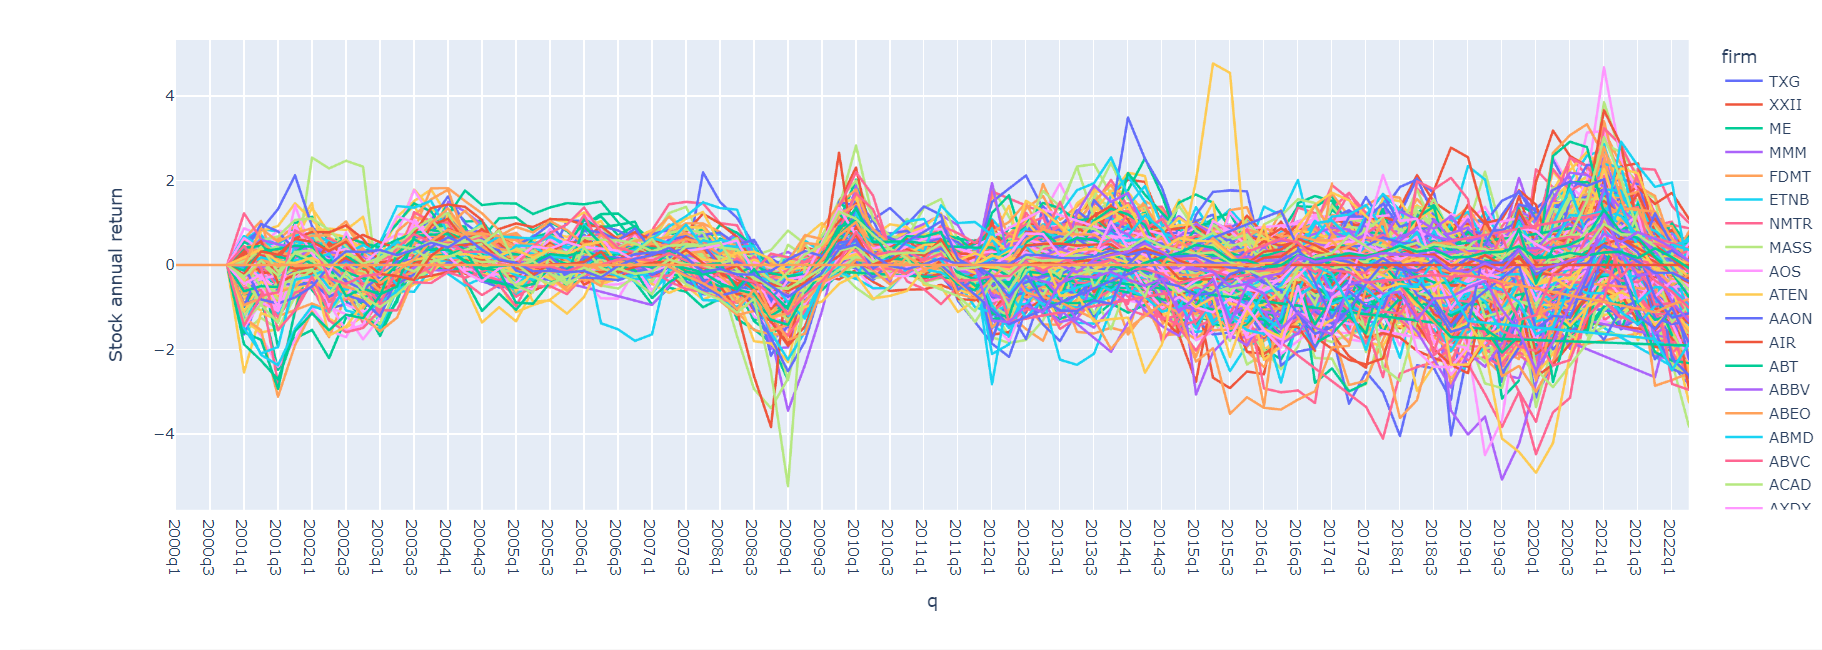

In [ ]:
df_M = df_financeAnalysis.loc[:, ["firm","q","Stock annual return", "F1r","EPSP", "Sales annual growth", "Operating profit growth", "Operating profit margin", 'Book to market ratio', 'Short financial leverage', 'Long financial leverage', 'isSmall', 'isMedium']]

In [ ]:
df_corrs = df_M.corr()["F1r"]
df_corrs.sort_values(ascending=False)

F1r                         1.000000
Stock annual return         0.699546
EPSP                        0.309573
Sales annual growth         0.144469
isMedium                    0.076848
Operating profit margin     0.037521
Operating profit growth     0.006906
Long financial leverage     0.002216
Short financial leverage   -0.026255
Book to market ratio       -0.094406
isSmall                    -0.151491
Name: F1r, dtype: float64

Haciendo una revisión de las correlaciones, podemos ver que existe una correlación considerable con cada una de las variables que seleccionamos para el analisis. Esto es un indicador de que podrían ser variables significativas en nuestro analisis, pero esto lo confirmaremos a continuacion en el analisis 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = df_M[["EPSP","Operating profit margin", "Sales annual growth", "Book to market ratio", "isSmall", "isMedium"]]

vif_data["feature"] = df_vif.columns
  
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)


                   feature       VIF
0                     EPSP  1.024980
1  Operating profit margin  1.013703
2      Sales annual growth  1.037024
3     Book to market ratio  1.257337
4                  isSmall  1.075969
5                 isMedium  1.204788


Podemos observar en el analisis de multicolinearidad que en ninguno de los casos el Vif es mayor a 10, asi que, vamos a descartar que exista un caso de multicolinearidad.

In [ ]:
import statsmodels.api as sm
#seleccionamos las variables a incluir en la regresion
X = df_M[["EPSP","Operating profit margin", "Sales annual growth", "Book to market ratio", "isSmall", "isMedium"]]
x = sm.add_constant(X)
y = df_M["F1r"]
#entrenamos el modelo
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    F1r   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     3590.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:14:15   Log-Likelihood:                -36884.
No. Observations:              134272   AIC:                         7.378e+04
Df Residuals:                  134265   BIC:                         7.385e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Podemos observar que la variable con mayor capacidad descriptiva es el EPSP.Tiene una relacion positiva con los retornos futuros y por cada +1 que haya en el EPSP los retornos van a incrementar en 1.1

Para el Operating profit margin vemos que existe una relación negativa y significativa de una magnitud muy pequeña por cada +1 que haya en el Operating profit margin los retornos se van a reducir en  4.302e-05.

Vemos que el sales annual growth tiene una relacion positiva y significativa con los retornos futuros por cada +1 en sales annual growth los retornos se incrementan en un 0.1578

Vemos que el Book to market ratio tiene una relacion negativa y significativa con los retornos futuros por cada +1 en Book to market ratio los retornos se reducen en un menos -0.1253

Por ultimo cabe mencionar que la base categorica son las empresas grandes por lo que  las variables isSmall y isMedium van a modificar al intercepto para hacerlo más pequeño, la reducción será mayor para las empresas pequeñas.
